# Avaliando modelo de classificação

### Criando o modelo
- Nas últimas aulas, criamos o modelo abaixo

In [135]:
### Importando bibliotecas e  base
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [136]:
base = pd.read_excel("BaseInadimplencia.xlsx",sheet_name='treino')

### Criando o modelo usando uma reta que separe esses pontos e plotando

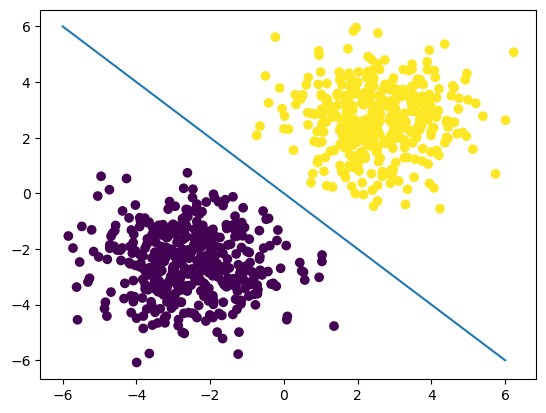

In [137]:
# Criando uma reta capaz de separar esses pontos
fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base['SaldoInvestimento'],c=base.Situacao)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

## Criando uma função que consiga classificar os dados de treino

In [138]:
# Criar uma função que classifique esses pontos
def clf(x,y):
    y_modelo = -x

    if y_modelo >= y:
        return 0
   
    elif y_modelo < y:
        return 1

#### Vamos adicionar a coluna Predict

In [139]:
# Verificando a base
base.head(2)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0


### Aplicando a função aos dados de treino

In [140]:
base['predict'] = base.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)

In [141]:
# Verificando a base
base.head(1)

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.36539,-3.280278,0,0


### Agrupando os dados para avaliar a classificação

In [142]:
base.groupby(['predict', "Situacao"])['Situacao'].count()

predict  Situacao
0        0           444
1        1           378
Name: Situacao, dtype: int64

# Avaliando o modelo criado (Tudo correto)

### Matriz de confusao

In [143]:
from sklearn.metrics import confusion_matrix

confusion_matrix(base['Situacao'], base['predict'])

array([[444,   0],
       [  0, 378]], dtype=int64)

## Acuracia

In [144]:
from sklearn.metrics import accuracy_score

accuracy_score(base['Situacao'], base['predict'])

1.0

## Precisao

In [145]:
from sklearn.metrics import precision_score

precision_score(base['Situacao'], base['predict'])

1.0

## Recall

In [146]:
from sklearn.metrics import recall_score

recall_score(base['Situacao'], base['predict'])

1.0

### Porem, esse modelo não aprendeu, ele "decorou". Esta funcionando apenas para esses dados, com novos dados inseridos, o modelo possivelmente não vai classificar corretamente

# Importar a aba "Teste" do nosso Data e avaliar o modelo com novos dados

In [147]:
teste = pd.read_excel("BaseInadimplencia.xlsx",sheet_name='teste')
teste.head(2)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.992492,-4.158429,0
1,-3.306014,-4.261263,0


## Vamos plotar o grafico e a reta com esses novos dados

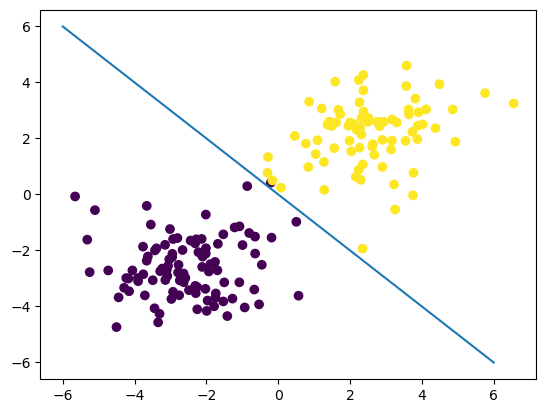

In [148]:
fig, ax = plt.subplots()

ax.scatter(teste.SaldoConta, teste['SaldoInvestimento'],c= teste.Situacao)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

## Vamos add a coluna Predict e aplicar a função criada para classificar os novos dados

In [149]:
teste['predict'] = teste.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)
teste.head(2)

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.992492,-4.158429,0,0
1,-3.306014,-4.261263,0,0


### Agrupando os dados para avaliar a classificação

In [150]:
teste.groupby(['predict', "Situacao"])['Situacao'].count()

predict  Situacao
0        0           98
1        0            1
         1           79
Name: Situacao, dtype: int64

# Avaliando o modelo criado com os novos dados

### Matriz de confusao

In [154]:
confusion_matrix(teste['Situacao'], teste['predict'])

array([[98,  1],
       [ 0, 79]], dtype=int64)

## Acuracia

In [155]:
accuracy_score(teste['Situacao'], teste['predict'])

0.9943820224719101

## Precisao

In [157]:
precision_score(teste['Situacao'], teste['predict'])

0.9875

## Recall

In [159]:
recall_score(teste['Situacao'], teste['predict'])

1.0

### Notamos que  o modelo classificou bem, mas houve uma queda ja prevista com os novos dados